In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('dataset\Iris.csv')

In [3]:
display(df.head())
display(df.info())
df.describe().T

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


## Cleaning

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.columns = df.columns.str.lower()

In [6]:
mean = df.pivot_table(index = 'species', aggfunc='mean').drop(columns='id')
mean

,petallengthcm,petalwidthcm,sepallengthcm,sepalwidthcm
species,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


> mean dari tiap species yang ada

In [7]:
df.drop(columns='id', inplace=True)

## Preprocessing

### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Scaling

In [9]:
X = df.drop(columns='species')
y = (df['species'])
numcol = X.columns.to_list()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [11]:
X = pd.DataFrame(X_scaled, columns=numcol)

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 100)

In [13]:
y_train.value_counts()

1    40
2    36
0    36
Name: species, dtype: int64

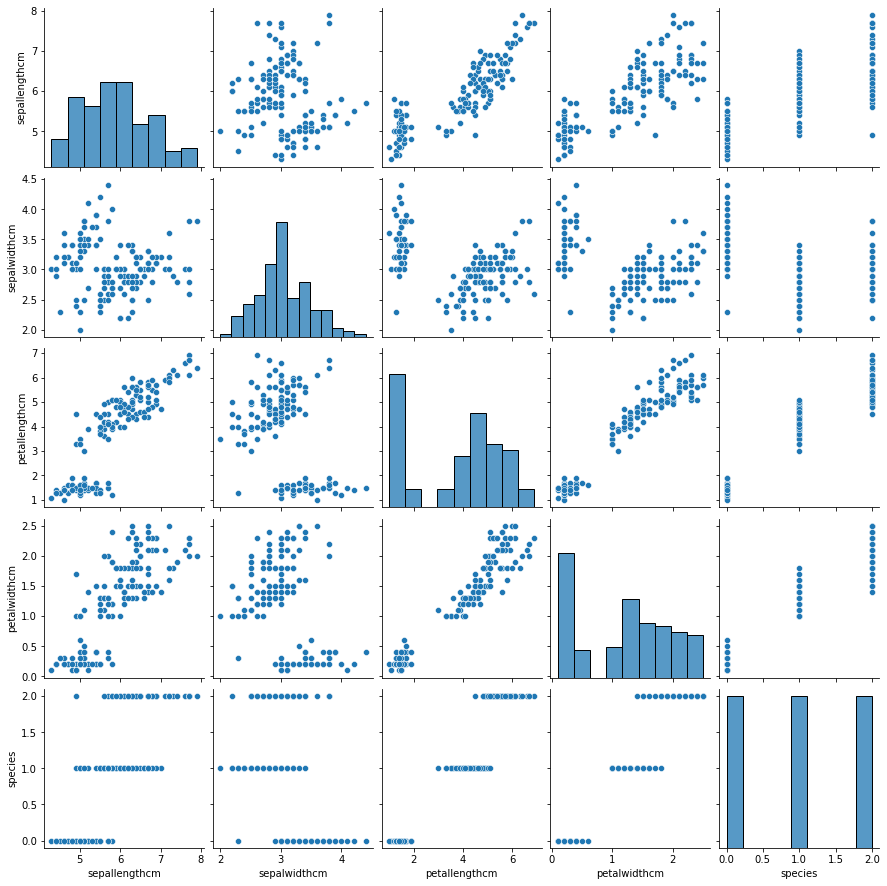

In [14]:
sns.pairplot(df)

<AxesSubplot:>

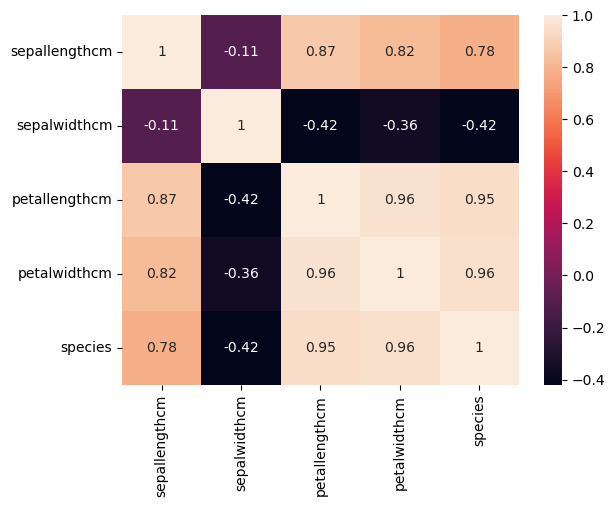

In [23]:
sns.heatmap(df.corr(), annot=True)

## Modelling

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred).rename({0:'species'}, axis=1)

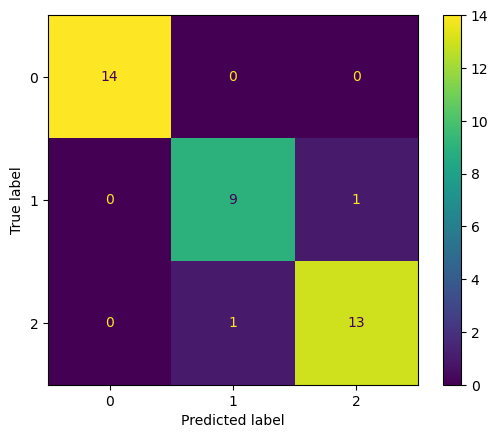

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [18]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
y_pred = pd.DataFrame(y_pred).rename({0:'species'}, axis=1)
y_test = pd.DataFrame(y_test.reset_index(drop=True))

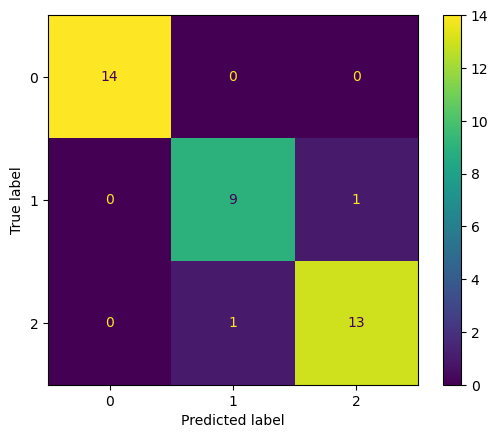

In [20]:
confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [23]:
classifier = DecisionTreeClassifier(criterion='log_loss')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [24]:
y_pred = pd.DataFrame(y_pred).rename({0:'species'}, axis=1)
y_test = pd.DataFrame(y_test.reset_index(drop=True))

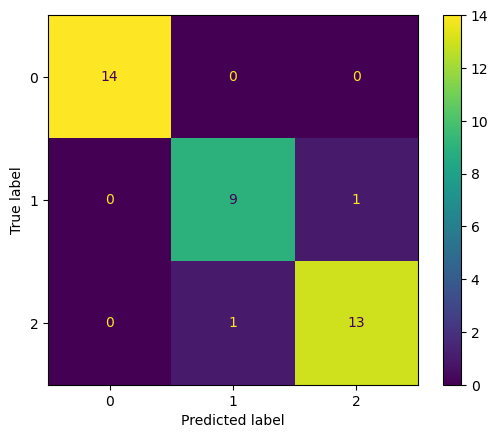

In [25]:
confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, pd.Series(y_train))
y_pred = lr.predict(X_test)

In [27]:
y_pred = pd.DataFrame(y_pred).rename({0:'species'}, axis=1)
y_test = pd.DataFrame(y_test.reset_index(drop=True))

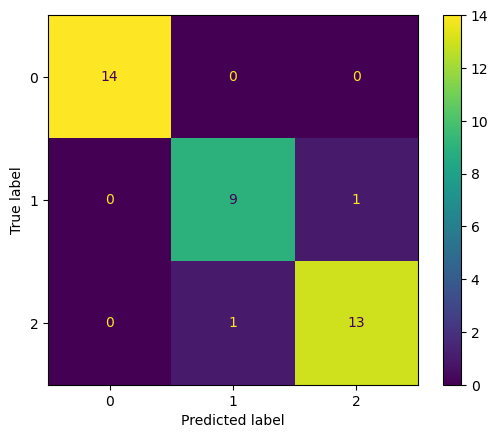

In [28]:
confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()